### Python 3.7
### 주피터 노트북 저장 공간에
### dataset 폴더와 FifaClub 폳더 만들어 주시기 바랍니다.

# FIFA 2019 PLAYERS' WAGES PREDICTION

## 컬럼별 의미 확인
- Age : 나이
- Nationality  :국적
- Overall : 선수 능력치 평균
- Potential: 잠재능력
- Club: 소속팀
- Value: 선수 예상 이적료, Age와 Overall로 계산된다고 추정
- Wage : 현재 임금(주급, 메시를 기준으로 7억원 정도로 뉴스기사와 확인)
- Special: 보너스 능력치
- PreferredFoot : 주요사용하는 발
- InternationalReputation : 국제적 명성
- WeakFoot: 주발이 아닌 약한 발의 능력치, 5에 가까우면 양발이라고 간주 가능.
- SkillMoves : 개인기 사용 가능 여부 포인트
- WorkRate: 적극성
- BodyType:체형 (범주화 비대 중간 왜소등으로)
- Height: 키
- Weight: 무게
- Crossing: 크로스라고 공을 우리 선수한테 보내주는 능력치
- Finishing: 골대 앞 마무리 능력
- HeadingAccuracy:헤딩 정확도
- ShortPassing:짧은 패스 정확도
- Volleys:발리 슛이라고 공을 드리블하지 않고 바로 슛하는능력치
- Dribbling: 드리블 능력치
- Curve: 크로스나 감아서차는 슛 같은 경우의 꺽이는 정도 능력치
- FKAccuracy: 프리킥 정확도
- LongPassing:긴패스 능력치
- BallControl: 볼컨트롤 능력치
- Acceleration: 달릴때 가속도 능력치
- SprintSpeed: 전력질주 속도 능력치
- Agility: 민첩성 능력치
- Reactions: 반응속도
- Balance: 신체 밸런스 (낮으면 넘어짐)
- ShotPower: 짧은시간에 내는 힘
- Jumping: 점프력
- Stamina: 스태미나 지구력 (높을수록 덜지침)
- Strength: 힘
- LongShots:중거리 슛 능력치
- Aggression: 침투력 상대뒤로 몰래 침투
- Interceptions: 상대방이 패스시 공뺏는 능력치
- Positioning: 자기 포지션의 위치를 잡는 능력치
- Vision: 시야가 넓고 낮음을 나타내는 능력치
- Penalties: 패널티킥(골키퍼 공격수 1:1)차기 능력치
- Composure: 침착성
- Marking: 상대 공격수를 마크하는 능력치
- StandingTackle: 서서 공뺏을때 태클하는 능력치
- SlidingTackle: 넘어지면서 태클시 공뺏는  능력치
- GKDiving: 골키퍼 다이빙 속도(빠를수록 좋음)
- GKHandling: 골키퍼 공을 손으로 잘잡는 능력치
- GKKicking: 골키퍼 킥능력치
- GKPositioning: 골키퍼 성향 적극성
- GKReflexes: 골키퍼 반사신경

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('./dataset/data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# 0. 날강두 제거
- 한국인의 의무.

In [4]:
df[df['Name']=='Cristiano Ronaldo']

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [5]:
df.drop(df[df['Name']=='Cristiano Ronaldo'].index, inplace=True)

In [6]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


# 1. 컬럼들 이름의 공백값 제거

In [7]:
#컬럼 공백값 제거
df = df.rename(columns={'Unnamed: 0':'Unnamed:0','Club Logo':'ClubLogo','Preferred Foot':'PreferredFoot',
                        'International Reputation':'InternationalReputation','Weak Foot':'WeakFoot',
                        'Skill Moves':'SkillMoves','Work Rate':'WorkRate','Body Type':'BodyType',
                        'Real Face':'RealFace','Jersey Number':'JerseyNumber','Loaned From':'LoanedFrom',
                        'Contract Valid Until':'ContractValidUntil','Release Clause': 'ReleaseClause'})

# 2. 정말 쓸다리없는 컬럼 제거
- Unnamed:0
- ID
- Photo
- Flag
- ClubLogo

In [8]:
df.drop('Unnamed:0 Photo Flag ClubLogo'.split(),axis=1,inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


# 3. Value(예상 이적료) 단위 변경
- 정수형 int로 바꿈
- 유로를 원으로 바꿈
- 2019년 당시 평균 원유로 환율 약 1,300원으로 측정
- 만원 단위로 표시
- 이적료가 없는 선수들은 삭제하기로 결정
- 분포 확인하여 로그 변환하기

In [9]:
df.Value.unique()

array(['€110.5M', '€118.5M', '€72M', '€102M', '€93M', '€67M', '€80M',
       '€51M', '€68M', '€77M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [10]:
# Value 형변환

def change_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000*1300/10000
    return float(out)

df.Value = df.Value.apply(lambda x: change_value_from(x))
df.Value

0        14365000.0
2        15405000.0
3         9360000.0
4        13260000.0
5        12090000.0
            ...    
18202        7800.0
18203        7800.0
18204        7800.0
18205        7800.0
18206        7800.0
Name: Value, Length: 18206, dtype: float64

In [11]:
df.drop(df[df['Value']==0].index, inplace=True)

(array([1.1857e+04, 1.9320e+03, 1.0700e+03, 6.7600e+02, 3.9300e+02,
        4.9800e+02, 2.6000e+02, 2.3500e+02, 2.3000e+02, 9.2000e+01,
        1.4700e+02, 5.8000e+01, 4.6000e+01, 6.2000e+01, 3.7000e+01,
        3.1000e+01, 4.2000e+01, 2.4000e+01, 3.0000e+01, 7.0000e+00,
        1.8000e+01, 2.5000e+01, 1.5000e+01, 5.0000e+00, 1.9000e+01,
        1.6000e+01, 1.1000e+01, 7.0000e+00, 1.0000e+01, 7.0000e+00,
        5.0000e+00, 7.0000e+00, 8.0000e+00, 1.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

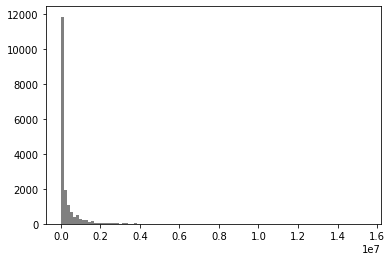

In [12]:
plt.hist(df.Value,bins=100,color='grey')

위 그래프로는 분포를 정확하게 알 수가 없다.

하위 분포만 다시 보겠다.

In [13]:
dfVAlue = df[df.Value<200000]
dfVAlue.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
318,5479,Casillas,37,Spain,82,82,FC Porto,195000.0,€10K,1308,Left,4.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 12, 2015",NaN,2019,6'1,185lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,25.0,21.0,14.0,25.0,25.0,13.0,22.0,23.0,59.0,57.0,62.0,77.0,46.0,28.0,77.0,43.0,70.0,13.0,23.0,22.0,16.0,65.0,24.0,70.0,24.0,11.0,13.0,87.0,74.0,58.0,82.0,84.0,€3M
554,49031,S. Sorrentino,39,Italy,80,80,Chievo Verona,130000.0,€10K,1178,Right,2.0,3.0,1.0,Medium/ Medium,Normal,No,GK,70.0,"Jul 6, 2016",NaN,2022,6'1,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10.0,10.0,36.0,18.0,14.0,14.0,11.0,34.0,20.0,34.0,40.0,52.0,67.0,48.0,21.0,74.0,28.0,74.0,13.0,22.0,25.0,10.0,34.0,20.0,66.0,25.0,10.0,13.0,81.0,82.0,66.0,82.0,79.0,€1.7M
926,135451,Gomes,37,Brazil,77,77,Watford,78000.0,€25K,1249,Right,2.0,2.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"May 24, 2014",NaN,2019,6'3,209lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,14.0,23.0,13.0,15.0,12.0,13.0,19.0,25.0,50.0,52.0,56.0,71.0,53.0,30.0,76.0,27.0,64.0,14.0,40.0,20.0,12.0,59.0,41.0,59.0,19.0,14.0,15.0,80.0,72.0,60.0,77.0,83.0,€1.1M
1287,139062,W. Caballero,36,Argentina,76,76,Chelsea,130000.0,€39K,1211,Right,2.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,13.0,"Jul 1, 2017",NaN,2019,6'1,179lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,22.0,33.0,13.0,12.0,23.0,11.0,48.0,30.0,43.0,46.0,39.0,73.0,55.0,23.0,70.0,37.0,69.0,14.0,30.0,19.0,7.0,47.0,16.0,57.0,14.0,11.0,12.0,75.0,72.0,71.0,77.0,76.0,€1.9M
1294,14907,A. Bizzarri,40,Argentina,76,76,Foggia,68250.0,€2K,1198,Right,2.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 17, 2018",NaN,2019,6'2,196lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,17.0,10.0,27.0,19.0,18.0,19.0,18.0,26.0,23.0,55.0,45.0,53.0,68.0,51.0,19.0,68.0,31.0,55.0,19.0,40.0,19.0,10.0,49.0,20.0,60.0,11.0,12.0,11.0,76.0,74.0,66.0,82.0,76.0,€840K


(array([ 36.,  23., 192., 150., 253., 136., 352., 193., 401., 174., 374.,
        202., 321., 140., 307., 139., 305., 157., 251., 240.,   0., 351.,
        325.,   0., 372.,   0., 323., 354.,   0., 343.,   0., 296., 294.,
          0., 338.,   0., 285., 261.,   0., 293.,   0., 238., 225.,   0.,
        270.,   0., 203., 241.,   0., 219.,   0., 184.,   0., 160., 197.,
          0., 186.,   0., 174., 190.,   0., 144.,   0., 162., 134.,   0.,
        318.,   0.,   0.,   0.,   0.,   0.,   0., 431.,   0.,   0.,   0.,
          0.,   0., 324.,   0.,   0.,   0.,   0.,   0.,   0., 260.,   0.,
          0.,   0.,   0.,   0.,   0., 221.,   0.,   0.,   0.,   0.,   0.,
        130.]),
 array([  1300.,   3237.,   5174.,   7111.,   9048.,  10985.,  12922.,
         14859.,  16796.,  18733.,  20670.,  22607.,  24544.,  26481.,
         28418.,  30355.,  32292.,  34229.,  36166.,  38103.,  40040.,
         41977.,  43914.,  45851.,  47788.,  49725.,  51662.,  53599.,
         55536.,  57473.,  59410.,

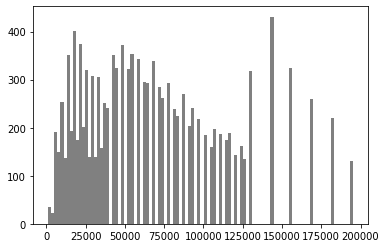

In [14]:
plt.hist(dfVAlue.Value,bins=100,color='grey')

하위 값을 나눌 수 있으므로 로그변환으로 정규성을 회복시키겠다.

(array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,   0.,   0.,   0.,
         23.,   0.,   0.,  65.,   0.,   0., 127.,   0., 150., 139.,   0.,
        114., 136., 178., 174., 193., 201., 374., 206., 370., 321., 306.,
        280., 305., 408., 240., 676., 372., 677., 343., 590., 623., 554.,
        733., 444., 563., 747., 440., 318., 431., 584., 221., 130., 272.,
        304.,  96., 325., 268., 167., 247., 278., 169., 272., 229., 155.,
        167., 187., 160., 338., 127., 255., 113., 155., 121., 107., 107.,
         83.,  62.,  55.,  37.,  52.,  37.,  33.,  32.,  30.,  25.,  19.,
         11.,  14.,   8.,   9.,  11.,   7.,   7.,   5.,   2.,   1.,   1.,
          2.]),
 array([ 7.17088848,  7.26468162,  7.35847476,  7.45226791,  7.54606105,
         7.63985419,  7.73364734,  7.82744048,  7.92123362,  8.01502676,
         8.10881991,  8.20261305,  8.29640619,  8.39019933,  8.48399248,
         8.57778562,  8.67157876,  8.76537191,  8.85916505,  8.95295819,
         9.04675133,  9.14

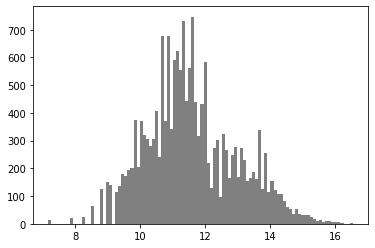

In [15]:
df['LogValue'] = np.log1p(df.Value)

plt.hist(df.LogValue,bins=100,color='grey')

In [16]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,16.480305
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,15405000.0,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,16.550203


# 4. PreferredFoot, WeakFoot 값 숫자 변환

- 왼발과 오른발을 임의로 정할 수 없어 nan값은 삭제.
- PreferredFoot과 WeakFoot의 파생변수
- 왼발잡이에게 1.5점을 우선 부여하고 WeakFoot의 점수를 더하겠다.
- 총 10개의 변수가 Foot 컬럼에 들어갔다.

In [17]:
print(df.PreferredFoot.unique())
print(df.PreferredFoot.isnull().sum())

['Left' 'Right' nan]
48


In [18]:
df.drop(df[df['PreferredFoot'].isnull()].index, inplace=True)

In [19]:
def foot(x):
    con = ''
    PreferredFoot, WeakFoot= x.PreferredFoot, x.WeakFoot
    if PreferredFoot == 'Left':
        if WeakFoot == 1:
            con = 2.5
        elif WeakFoot ==2:
            con = 3.5
        elif WeakFoot ==3:
            con = 4.5
        elif WeakFoot ==4:
            con = 5.5
        elif WeakFoot ==5:
            con = 6.5
            
    if PreferredFoot == 'Right':
        if WeakFoot == 1:
            con = 1
        elif WeakFoot ==2:
            con = 2
        elif WeakFoot ==3:
            con = 3
        elif WeakFoot ==4:
            con = 4
        elif WeakFoot ==5:
            con = 5
    return con

df['Foot'] = df.apply(foot, axis=1)

# 5. LoanedFrom 값 숫자 변환

- 이 칼럼은 선수의 임대 여부를 알려주는 칼럼
- 이 곳에 값이 들어 있는 경우 1, 
- 값이 없으면 0를 반영하여 새로운 칼럼을 만들었음.

In [20]:
df.LoanedFrom

0        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
18202    NaN
18203    NaN
18204    NaN
18205    NaN
18206    NaN
Name: LoanedFrom, Length: 17906, dtype: object

In [21]:
df.LoanedFrom.unique()

array([nan, 'Real Madrid', 'Juventus', 'FC Barcelona', 'SL Benfica',
       'Sassuolo', 'Atlético Madrid', 'Valencia CF',
       'Paris Saint-Germain', 'Chelsea', 'AS Monaco', 'Torino',
       'Atalanta', 'Milan', 'Sevilla FC', 'Liverpool', 'Arsenal',
       'Sampdoria', 'RSC Anderlecht', 'FC Porto', 'Roma', 'Fiorentina',
       'Guangzhou Evergrande Taobao FC', 'Inter', 'Jiangsu Suning FC',
       'RCD Espanyol', 'Club Tijuana', 'West Bromwich Albion',
       'Villarreal CF', 'Napoli', 'Borussia Dortmund', 'Southampton',
       'Udinese', 'Swansea City', 'Hamburger SV', 'Málaga CF',
       'Sporting CP', 'Leicester City', 'Everton', 'En Avant de Guingamp',
       'Genoa', 'SD Eibar', 'Bologna', 'FC Girondins de Bordeaux', 'PSV',
       'Real Betis', 'Toulouse Football Club', 'Querétaro', 'Levante UD',
       'Henan Jianye FC', 'Club Atlas', 'RC Celta', 'Stoke City',
       'Tigres U.A.N.L.', 'Atlético Nacional', 'LOSC Lille',
       'Newcastle United', 'Deportivo de La Coruña', 'Depor

In [22]:
df.LoanedFrom.replace(np.nan, '0', inplace=True)
df.LoanedFrom

0        0
2        0
3        0
4        0
5        0
        ..
18202    0
18203    0
18204    0
18205    0
18206    0
Name: LoanedFrom, Length: 17906, dtype: object

In [23]:
df.LoanedFrom.unique()

array(['0', 'Real Madrid', 'Juventus', 'FC Barcelona', 'SL Benfica',
       'Sassuolo', 'Atlético Madrid', 'Valencia CF',
       'Paris Saint-Germain', 'Chelsea', 'AS Monaco', 'Torino',
       'Atalanta', 'Milan', 'Sevilla FC', 'Liverpool', 'Arsenal',
       'Sampdoria', 'RSC Anderlecht', 'FC Porto', 'Roma', 'Fiorentina',
       'Guangzhou Evergrande Taobao FC', 'Inter', 'Jiangsu Suning FC',
       'RCD Espanyol', 'Club Tijuana', 'West Bromwich Albion',
       'Villarreal CF', 'Napoli', 'Borussia Dortmund', 'Southampton',
       'Udinese', 'Swansea City', 'Hamburger SV', 'Málaga CF',
       'Sporting CP', 'Leicester City', 'Everton', 'En Avant de Guingamp',
       'Genoa', 'SD Eibar', 'Bologna', 'FC Girondins de Bordeaux', 'PSV',
       'Real Betis', 'Toulouse Football Club', 'Querétaro', 'Levante UD',
       'Henan Jianye FC', 'Club Atlas', 'RC Celta', 'Stoke City',
       'Tigres U.A.N.L.', 'Atlético Nacional', 'LOSC Lille',
       'Newcastle United', 'Deportivo de La Coruña', 'Depor

In [24]:
df[df['LoanedFrom']!='0']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot
28,198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,9035000.0,€315K,2171,Left,4.0,3.0,4.0,Medium/ Medium,Normal,Yes,LAM,10.0,NaN,Real Madrid,"Jun 30, 2019",5'11,172lbs,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,85+3,85+3,85+3,83+3,81+3,81+3,81+3,83+3,69+3,68+3,68+3,68+3,69+3,65+3,58+3,58+3,58+3,65+3,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN,16.016617,4.5
38,167664,G. Higuaín,30,Argentina,88,88,Milan,7410000.0,€245K,1965,Right,4.0,4.0,3.0,High/ Medium,Normal,Yes,LS,9.0,NaN,Juventus,"Jun 30, 2019",6'1,196lbs,85+3,85+3,85+3,81+3,83+3,83+3,83+3,81+3,80+3,80+3,80+3,78+3,71+3,71+3,71+3,78+3,55+3,53+3,53+3,53+3,55+3,51+3,48+3,48+3,48+3,51+3,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN,15.818341,4.0
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,4810000.0,€235K,2245,Right,3.0,3.0,3.0,High/ High,Lean,Yes,LDM,9.0,NaN,FC Barcelona,"Jun 30, 2019",6'0,157lbs,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,82+3,82+3,82+3,79+3,78+3,81+3,81+3,81+3,78+3,78+3,80+3,80+3,80+3,78+3,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN,15.386208,3.0
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,4745000.0,€18K,2142,Left,2.0,4.0,4.0,High/ Medium,Normal,No,CAM,24.0,NaN,SL Benfica,"Dec 31, 2018",6'3,176lbs,80+2,80+2,80+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,80+2,79+2,79+2,79+2,80+2,69+2,69+2,69+2,69+2,69+2,67+2,64+2,64+2,64+2,67+2,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN,15.372602,5.5
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,4550000.0,€165K,2115,Right,3.0,4.0,4.0,High/ High,Normal,Yes,LCM,17.0,NaN,Real Madrid,"Jun 30, 2019",5'9,172lbs,71+3,71+3,71+3,79+3,78+3,78+3,78+3,79+3,81+3,81+3,81+3,80+3,82+3,82+3,82+3,80+3,76+3,78+3,78+3,78+3,76+3,74+3,69+3,69+3,69+3,74+3,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN,15.330638,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17978,225468,M. Bloomfield,21,England,51,57,Hamilton Academical FC,6500.0,€3K,1277,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,ST,16.0,NaN,Norwich City,"Jun 30, 2019",5'11,165lbs,49+2,49+2,49+2,49+2,49+2,49+2,49+2,49+2,47+2,47+2,47+2,47+2,40+2,40+2,40+2,47+2,34+2,31+2,31+2,31+2,34+2,33+2,30+2,30+2,30+2,33+2,34.0,53.0,44.0,38.0,40.0,50.0,39.0,26.0,33.0,48.0,64.0,74.0,56.0,49.0,65.0,42.0,62.0,48.0,60.0,43.0,35.0,16.0,47.0,45.0,62.0,49.0,14.0,13.0,13.0,12.0,13.0,16.0,9.0,14.0,NaN,8.779711,2.0
17979,241341,Zhang Yuan,2

In [25]:
df.LoanedFrom[df.LoanedFrom!='0']

28                   Real Madrid
38                      Juventus
91                  FC Barcelona
166                   SL Benfica
176                  Real Madrid
                  ...           
17978               Norwich City
17979        Tianjin Quanjian FC
18026          Jiangsu Suning FC
18031    Beijing Sinobo Guoan FC
18056                       Roma
Name: LoanedFrom, Length: 1264, dtype: object

In [26]:
df.LoanedFrom[df.LoanedFrom!='0']='1'

In [27]:
df['LoanedFrom'] = df['LoanedFrom'].astype(int)

In [28]:
df.LoanedFrom.unique()

array([0, 1])

# 6. WorkRate값 숫자 변환

- High,Medium,Low/ High,Medium,Low의 9가지 구성
- 1~9점까지 점수화하여 변환

In [29]:
# WorkRate 9가지로 나누기.
df['WorkRate'].replace({'High/ High':1,'High/ Medium':2,
                         'Medium/ High':3,'Low/ High':4,'High/ Low':5,
                         'Medium/ Medium':6,'Low/ Medium':7,'Medium/ Low':8,'Low/ Low':9},inplace = True)
df['WorkRate'].astype(int)

0        6
2        2
3        6
4        1
5        2
        ..
18202    6
18203    6
18204    6
18205    6
18206    6
Name: WorkRate, Length: 17906, dtype: int32

# 7. RealFace 숫자화
- RealFace의 값은 Yes, No 2가지 이므로 1,0으로 변환

In [30]:
df.RealFace = df['RealFace'].replace({'Yes':1,'No':0}).astype(int)

# 8. Height(키) 단위변환
- 인치에서 센치로 바꿈

In [31]:
np.sort(df.Height.unique())

array(["5'1", "5'10", "5'11", "5'2", "5'3", "5'4", "5'5", "5'6", "5'7",
       "5'8", "5'9", "6'0", "6'1", "6'2", "6'3", "6'4", "6'5", "6'6",
       "6'7", "6'8", "6'9"], dtype=object)

In [32]:
def convert_height(height):
    height = str(height)
    numbers = height.split("'")
    ft = int(numbers[0])*30
    inch = int(numbers[1])*2.5
    return ft+inch

df.Height = df.Height.apply(convert_height)
df.Height

0        167.5
2        172.5
3        190.0
4        177.5
5        170.0
         ...  
18202    172.5
18203    187.5
18204    170.0
18205    175.0
18206    175.0
Name: Height, Length: 17906, dtype: float64

# 9. Weight(몸무게) 단위변환
- 파운드를 킬로그램으로 변환

In [33]:
np.sort(df.Weight.unique())

array(['110lbs', '115lbs', '117lbs', '119lbs', '121lbs', '123lbs',
       '126lbs', '128lbs', '130lbs', '132lbs', '134lbs', '137lbs',
       '139lbs', '141lbs', '143lbs', '146lbs', '148lbs', '150lbs',
       '152lbs', '154lbs', '157lbs', '159lbs', '161lbs', '163lbs',
       '165lbs', '168lbs', '170lbs', '172lbs', '174lbs', '176lbs',
       '179lbs', '181lbs', '183lbs', '185lbs', '187lbs', '190lbs',
       '192lbs', '194lbs', '196lbs', '198lbs', '201lbs', '203lbs',
       '205lbs', '207lbs', '209lbs', '212lbs', '214lbs', '216lbs',
       '218lbs', '220lbs', '223lbs', '225lbs', '227lbs', '229lbs',
       '234lbs', '236lbs', '243lbs'], dtype=object)

In [34]:
def convert_weight(weight):
    weight = str(weight)
    weight = weight.replace("lbs","")
    weight = float(weight)
    weight *= 0.453592
    weight = round(weight)
    return weight

df.Weight = df.Weight.apply(convert_weight)
df.Weight

0        72
2        68
3        76
4        70
5        74
         ..
18202    61
18203    77
18204    67
18205    70
18206    80
Name: Weight, Length: 17906, dtype: int64

# 10. LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB LDM CDM RDM RWB LB LCB CB RCB RB 컬럼
- null값은 골키퍼들의 값인데 측정불가이므로 0으로 바꿈.
- +값 제거하고 양쪽 숫자 더하기

In [35]:
df.LS.unique()

array(['88+2', '84+3', nan, '82+3', '83+3', '77+3', '87+5', '73+3',
       '87+3', '78+3', '64+3', '72+3', '86+3', '71+3', '85+3', '58+3',
       '80+3', '76+3', '79+3', '69+3', '66+3', '70+3', '52+3', '81+3',
       '68+3', '82+2', '75+2', '62+3', '74+3', '75+3', '67+3', '65+3',
       '61+3', '57+2', '81+2', '49+3', '74+2', '63+3', '60+3', '82+4',
       '61+2', '56+2', '64+2', '77+2', '59+3', '70+2', '57+3', '72+2',
       '55+3', '78+2', '59+2', '73+2', '76+2', '52+2', '80+2', '79+2',
       '56+3', '53+2', '58+2', '69+2', '51+3', '66+2', '67+2', '68+2',
       '65+2', '62+2', '55+2', '71+2', '63+2', '60+2', '54+2', '49+2',
       '50+2', '51+2', '48+2', '47+2', '47+3', '46+2', '42+2', '44+2',
       '45+2', '43+2', '40+2', '39+2', '37+2', '41+2', '38+2', '36+2',
       '34+2', '35+2', '31+2', '33+2', '32+2'], dtype=object)

In [36]:
# 결측치0으로 채워넣음
df['LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
    LDM CDM RDM RWB LB LCB CB RCB RB'.split()] = df['LS ST RS \
    LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
       LDM CDM RDM RWB LB LCB CB RCB RB'.split()].fillna(value='0+0')

In [37]:
a = 'LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
    LDM CDM RDM RWB LB LCB CB RCB RB'.split()

for i in a:
    df[i] = pd.to_numeric(df[i].str.split('+',n=1,expand=True)[0])+\
            pd.to_numeric(df[i].str.split('+',n=1,expand=True)[1])

In [38]:
df.LS

0        90
2        87
3         0
4        85
5        86
         ..
18202    44
18203    47
18204    47
18205    49
18206    45
Name: LS, Length: 17906, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17906 entries, 0 to 18206
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       17906 non-null  int64  
 1   Name                     17906 non-null  object 
 2   Age                      17906 non-null  int64  
 3   Nationality              17906 non-null  object 
 4   Overall                  17906 non-null  int64  
 5   Potential                17906 non-null  int64  
 6   Club                     17906 non-null  object 
 7   Value                    17906 non-null  float64
 8   Wage                     17906 non-null  object 
 9   Special                  17906 non-null  int64  
 10  PreferredFoot            17906 non-null  object 
 11  InternationalReputation  17906 non-null  float64
 12  WeakFoot                 17906 non-null  float64
 13  SkillMoves               17906 non-null  float64
 14  WorkRate              

# 11. ReleaseClause 단위 변환

In [40]:
df.ReleaseClause.isnull().sum()

1264

In [41]:
#ReleaseClause 결측치 채우기
df['ReleaseClause'].fillna('€0M', inplace=True)

In [42]:
# ReleaseClause 형변환

def change_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000*1300/10000
    return float(out)

df.ReleaseClause = df.ReleaseClause.apply(lambda x: change_value_from(x))
df.ReleaseClause

0        29445000.0
2        29653000.0
3        18018000.0
4        25532000.0
5        22373000.0
            ...    
18202       18590.0
18203       14690.0
18204       21450.0
18205       18590.0
18206       21450.0
Name: ReleaseClause, Length: 17906, dtype: float64

# 12. Position 범주화


- Foward, Medfielder, Defender GoalKeeper 4개로 범주화한 PositionClass

In [43]:
# 포지션 범주화
def get_category(pos):
    cat=''
    if pos in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        cat = 'Foward'
    elif pos in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        cat = 'Medfielder'
    elif pos in ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        cat = 'Defender'
    else: cat = 'GoalKeeper'
        
    
    return cat

df["PositionClass"] = df.Position.apply(lambda x : get_category(x))
df.loc[:, ['Position', 'PositionClass']].head()

,Position,PositionClass
0,RF,Foward
2,LW,Foward
3,GK,GoalKeeper
4,RCM,Medfielder
5,LF,Foward


# 13. Wage 단위 변환
- 정수형 int로 바꿈
- 유로를 원으로 바꿈
- 2019년 당시 평균 원유로 환율 약 1,300원으로 측정
- 만원 단위로 표시
- 주급이 없는 선수들은 선수가 아니라고 판단하여 241명 삭제
- Wage 순서대로 정렬

In [44]:
df.Wage

0        €565K
2        €290K
3        €260K
4        €355K
5        €340K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 17906, dtype: object

In [45]:
def extract_value_from(Wage):
    out = Wage.replace('€','')
    if 'M' in out:
        out = int(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = int(out.replace('K',''))*1000*1300/10000
    return int(out)

df.Wage = df.Wage.apply(lambda x: extract_value_from(x))
df.Wage

0        73450
2        37700
3        33800
4        46150
5        44200
         ...  
18202      130
18203      130
18204      130
18205      130
18206      130
Name: Wage, Length: 17906, dtype: int64

In [46]:
# 주급이 없는 선수들
df[df['Wage']==0]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass


In [47]:
df.drop(df[df['Wage']==0].index, inplace=True)

# Wage의 분포와 unique값의 종류와 분포를 알아보자.

(array([9.530e+03, 2.802e+03, 1.239e+03, 8.670e+02, 6.150e+02, 2.970e+02,
        4.150e+02, 3.290e+02, 2.890e+02, 1.810e+02, 1.750e+02, 7.800e+01,
        1.110e+02, 1.090e+02, 1.060e+02, 1.020e+02, 4.900e+01, 6.100e+01,
        5.500e+01, 4.600e+01, 3.400e+01, 2.400e+01, 2.500e+01, 2.100e+01,
        1.500e+01, 1.900e+01, 2.600e+01, 8.000e+00, 1.600e+01, 1.900e+01,
        1.200e+01, 1.300e+01, 1.300e+01, 8.000e+00, 1.000e+01, 3.000e+00,
        1.300e+01, 0.000e+00, 1.500e+01, 0.000e+00, 1.800e+01, 0.000e+00,
        1.100e+01, 1.300e+01, 0.000e+00, 1.100e+01, 0.000e+00, 7.000e+00,
        0.000e+00, 9.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 8.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

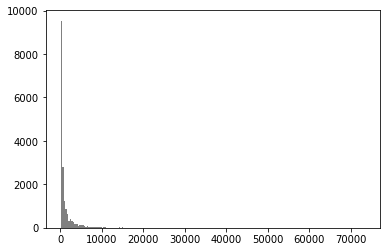

In [48]:
plt.hist(df.Wage,bins=200,color='grey')

(array([3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2.,
        3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 2.,
        3., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  130. ,   496.6,   863.2,  1229.8,  1596.4,  1963. ,  2329.6,
         2696.2,  3062.8,  3429

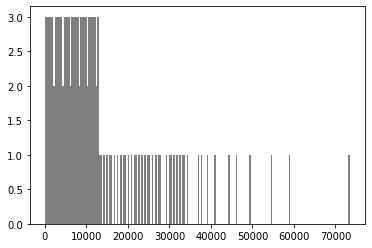

In [49]:
plt.hist(df.Wage.unique(),bins=200,color='grey')

- 모두 다 하위값에 쏠려있어서 알아보기가 쉽지 않다.

# Wage의 로그 변환컬럼도 생성

- Wage의 단위 때문에 하는 것이지 정규성을 회복하려고 하는 것이 아니다.
- 바로 df.LogWage.unique()를 히스토그램에 넣어서 유니크값으로도 알아 볼 수가 있다.

In [50]:
df['LogWage'] = np.log1p(df.Wage)

(array([4.866e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.814e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.850e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.254e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 8.660e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.820e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.880e+02, 0.000e+00, 0.000e+00, 0.000e+00, 4.230e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 3.280e+02, 0.000e+00, 0.000e+00,
        3.190e+02, 0.000e+00, 0.000e+00, 2.920e+02, 0.000e+00, 0.000e+00,
        2.560e+02, 0.000e+00, 2.270e+0

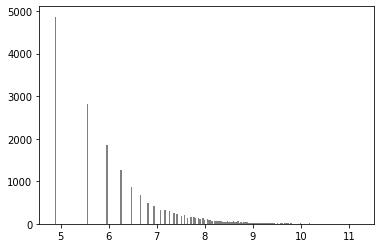

In [51]:
plt.hist(df.LogWage,bins=200,color='grey')

# 데이터의 분포는 여전히 멱급수이다.

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
        1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2.,
        2., 3., 2., 3., 3., 3., 3., 3., 3., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 2., 1., 2., 1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 4.87519732,  4.90684321,  4.93848909,  4.97013497,  5.00178085,
         5.03342674,  5.06507

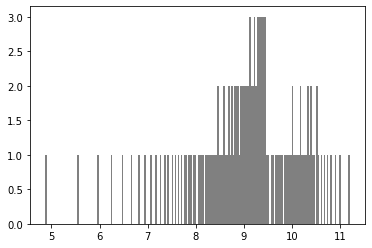

In [52]:
plt.hist(df.LogWage.unique(),bins=200,color='grey')

# 유니크 값들은 9정도에 모두 몰려있다.

- 8 ~ 10.5 사이에 엄청 많은 값들이 겹쳐 있는 것을 알 수 있다.

- 단순하게 10을 곱해서 상위로 갈 수록 값의 간격이 커지도록 했다.

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
        1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 3., 2.,
        2., 3., 2., 3., 3., 3., 3., 3., 3., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 2., 1., 2., 1., 1., 0., 2., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 48.75197323,  49.06843206,  49.38489088,  49.7013497 ,
         50.01780853,  50.33426735,  5

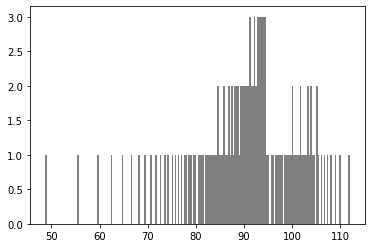

In [53]:
df['LogWage'] = df['LogWage']*10
plt.hist(df.LogWage.unique(),bins=200,color='grey')

# 너무 값이 작아서 사용하기 편하게 10을 임의로 곱해줌

- LogWage가 보기편하므로 LogWage를 사용하여 처리하자.

# 14. 훈련용, 테스트용 데이터 분리하기


- 이제 테스트용 데이터는 블랙박스이다.
- Wage의 내림차순으로 정렬하겠다.

In [54]:
from sklearn.model_selection import train_test_split

y_target = df['Wage']
x_data = df.drop('Wage',axis=1)


x_train , x_test , y_train , y_test = \
    train_test_split(x_data , y_target ,test_size=0.2, random_state=107)

# 훈련용 데이터
df = pd.concat([y_train, x_train],axis=1)

# 테스트용 데이터
dfTest = pd.concat([y_test, x_test],axis=1)

dfTest.to_pickle('./dataset/FIFAtest.pkl')

In [55]:
df = df.sort_values(by='Wage', ascending=False)
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0,83330.0,11.030865,4.5,Defender,48.751973
14320,130,228457,A. Dabasse,24,France,61,63,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,2.0,6,Normal,0,ST,20.0,"Jul 1, 2015",0,2019,185.0,79,61,61,61,56,59,59,59,56,57,57,57,54,53,53,53,54,42,43,43,43,42,40,40,40,40,40,29.0,59.0,62.0,57.0,61.0,58.0,47.0,44.0,44.0,61.0,55.0,50.0,54.0,49.0,48.0,71.0,50.0,59.0,71.0,69.0,42.0,28.0,58.0,49.0,64.0,58.

# !! 이제부터 전처리란 표현을 사용하겠다. !!

# 15.Club 전처리

- 당연히 구단에 따라서 받는 주급이 다를 수 밖에 없을 것이다.
- 구단별로 그 구단이 지출하는 주급의 평균 컬럼을 만들겠다.
- 테스트 데이터에선 반영이 되지 않도록 하겠다.

# 각 클럽의 평균, 중앙, 최솟값의 컬럼을 만들겠다.

In [56]:
df['Club']

0                          FC Barcelona
1                           Real Madrid
2                           Real Madrid
3                           Real Madrid
4                           Real Madrid
                      ...              
14319                    Atlético Huila
14320    Chamois Niortais Football Club
14321                New York Red Bulls
14322                       Lech Poznań
14323                         Excelsior
Name: Club, Length: 14324, dtype: object

In [57]:
ClubWageMean = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMean'])
ClubLogWageMean = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMean'])

ClubWageMedian = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMedian'])
ClubLogWageMedian = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMedian'])

ClubWageMin = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMin'])
ClubLogWageMin = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMin'])

In [58]:
df = pd.concat([df,ClubWageMean, ClubLogWageMean, 
                ClubWageMedian, ClubLogWageMedian,
                ClubWageMin,ClubLogWageMin], axis=1)
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,0.0,0.0,0.0,0.0,0.0,0.0
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,0.0,0.0,0.0,0.0,0.0,0.0
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,0.0,0.0,0.0,0.0,0.0,0.0
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,0.0,0.0,0.0,0.0,0.0,0.0
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0,83330.0,11.030865,4.5,Defender,48.751973,0.0,0.0,0.0,0.0,0.0,0.0
14320,130,228457,A. Dabasse,24,France,61,63,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,2.

# !!주의!!

## LogWage로 평균을 내면 실제와 달라진다.

## 데이터 각각의 값은 LogWage를 np.expm1()을 해주면 Wage가 되지만

## 총합, 평균등은 값이 한참 달라진다.

## 지수는 곱해야지 덧셈이고 나눠야지 뺄셈이기 때문이다.

## 지수법칙에 의해서 그렇다.

## describe를 이용해서 Wage의 평균, 총합을 Log해줘야지 제대로 된다.

# 반드시 Wage의 describe()를 이용해서 LogWageMean을 구해야한다!

## Log 변환된 값을 다룰 때는 신중해야한다.

In [59]:
for i in range(df.shape[0]):
    
    df.ClubWageMean[i] = df[df.Club==df.Club[i]].Wage.mean()
    df.ClubLogWageMean[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[1])*10

    df.ClubWageMedian[i] = df[df.Club==df.Club[i]].Wage.median()
    df.ClubLogWageMedian[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[5])*10    
    
    df.ClubWageMin[i] = df[df.Club==df.Club[i]].Wage.min()
    df.ClubLogWageMin[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[3])*10

In [60]:
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0

In [61]:
drop_duplicates  = df['Club ClubWageMean ClubLogWageMean ClubLogWageMin'.split()]
drop_duplicates = drop_duplicates.drop_duplicates()
drop_duplicates = drop_duplicates.sort_values(by='ClubWageMean', ascending=False)
drop_duplicates = drop_duplicates.reset_index()
drop_duplicates.drop('index',axis=1,inplace=True)
drop_duplicates.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650
Club,Real Madrid,FC Barcelona,Manchester City,Juventus,Manchester United,Liverpool,Chelsea,Tottenham Hotspur,FC Bayern München,Arsenal,Napoli,Paris Saint-Germain,Milan,Everton,Inter,Roma,West Ham United,Atlético Madrid,Beşiktaş JK,Leicester City,Olympique Lyonnais,Bayer 04 Leverkusen,Borussia Dortmund,Lazio,Fenerbahçe SK,Fiorentina,Watford,Wolverhampton Wanderers,Southampton,Olympique de Marseille,AS Monaco,Bournemouth,Sassuolo,Burnley,Galatasaray SK,Crystal Palace,RB Leipzig,Torino,Brighton & Hove Albion,Club América,Newcastle United,Fulham,Valencia CF,Stoke City,Tigres U.A.N.L.,Atlético Mineiro,Celtic,VfL Wolfsburg,Nottingham Forest,Villarreal CF,Sampdoria,Real Sociedad,Cagliari,Cardiff City,Bologna,Middlesbrough,FC Girondins de Bordeaux,TSG 1899 Hoffenheim,FC Schalke 04,Girona FC,Grêmio,VfB Stuttgart,Eintracht Frankfurt,Parma,Atalanta,Huddersfield Town,Rangers FC,Real Betis,Derby County,Monterrey,Medipol Başakşehir FK,Leeds United,SD Eibar,Internacional,OGC Nice,Cruzeiro,Borussia Mönchengladbach,CD Leganés,AS Saint-Étienne,Sevilla FC,Hannover 96,Stade Rennais FC,Deportivo Alavés,Fluminense,Getafe CF,Boca Juniors,Levante UD,West Bromwich Albion,Hertha BSC,Bristol City,Guangzhou Evergrande Taobao FC,Al Hilal,RC Celta,SV Werder Bremen,Wigan Athletic,Athletic Club de Bilbao,RCD Espanyol,FC Nantes,Trabzonspor,Aston Villa,1. FSV Mainz 05,Guadalajara,FC Red Bull Salzburg,Toulouse Football Club,Udinese,Sporting CP,FC Porto,Montpellier HSC,Al Nassr,Brentford,Independiente,LOSC Lille,En 

In [62]:
df.to_pickle('./dataset/나혼자FIFA_사전정리.pkl')

# 평균 주급 순으로 클럽 정렬

- 평균 주급은 클럽의 주급 총액 평균이다.

In [63]:
ClubMeanWageOrder = pd.DataFrame(df.sort_values(by='ClubWageMean', \
                        ascending=False).Club.unique(),columns=['Club'])
ClubMeanWageOrder

,Club
0,Real Madrid
1,FC Barcelona
2,Manchester City
3,Juventus
4,Manchester United
...,...
646,IF Brommapojkarna
647,Lokomotiv Moscow
648,Trelleborgs FF
649,Bohemian FC


In [64]:
join = pd.DataFrame(np.zeros(ClubMeanWageOrder.shape[0]),columns=['ClubWageMean'])
join

,ClubWageMean
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
646,0.0
647,0.0
648,0.0
649,0.0


In [65]:
ClubMeanWageOrder = pd.concat([ClubMeanWageOrder,join], axis=1)
ClubMeanWageOrder

,Club,ClubWageMean
0,Real Madrid,0.0
1,FC Barcelona,0.0
2,Manchester City,0.0
3,Juventus,0.0
4,Manchester United,0.0
...,...,...
646,IF Brommapojkarna,0.0
647,Lokomotiv Moscow,0.0
648,Trelleborgs FF,0.0
649,Bohemian FC,0.0


In [66]:
for i in range(ClubMeanWageOrder.shape[0]):
    ClubMeanWageOrder.ClubWageMean[i] = df[df.Club==
                            ClubMeanWageOrder.Club[i]].ClubWageMean.mean()

In [67]:
ClubMeanWageOrder

,Club,ClubWageMean
0,Real Madrid,20335.000000
1,FC Barcelona,17654.000000
2,Manchester City,16088.800000
3,Juventus,15550.476190
4,Manchester United,13341.851852
...,...,...
646,IF Brommapojkarna,130.000000
647,Lokomotiv Moscow,130.000000
648,Trelleborgs FF,130.000000
649,Bohemian FC,130.000000


# !!중복 행을 제거하는 방법!!

In [68]:
drop_duplicates = df[['Club','ClubWageMean']]
drop_duplicates

,Club,ClubWageMean
0,FC Barcelona,17654.000000
1,Real Madrid,20335.000000
2,Real Madrid,20335.000000
3,Real Madrid,20335.000000
4,Real Madrid,20335.000000
...,...,...
14319,Atlético Huila,146.250000
14320,Chamois Niortais Football Club,198.421053
14321,New York Red Bulls,429.000000
14322,Lech Poznań,448.500000


In [69]:
drop_duplicates = drop_duplicates.drop_duplicates()
drop_duplicates

,Club,ClubWageMean
0,FC Barcelona,17654.000000
1,Real Madrid,20335.000000
5,Manchester City,16088.800000
6,Chelsea,12319.666667
9,FC Bayern München,10842.000000
...,...,...
10741,Sligo Rovers,130.000000
10742,FC Energie Cottbus,130.000000
10777,Boyacá Chicó FC,130.000000
10800,Limerick FC,130.000000


In [70]:
drop_duplicates = drop_duplicates.sort_values(by='ClubWageMean', ascending=False)
drop_duplicates = drop_duplicates.reset_index()
drop_duplicates.drop('index',axis=1,inplace=True)
drop_duplicates

,Club,ClubWageMean
0,Real Madrid,20335.000000
1,FC Barcelona,17654.000000
2,Manchester City,16088.800000
3,Juventus,15550.476190
4,Manchester United,13341.851852
...,...,...
646,HJK Helsinki,130.000000
647,AEK Athens,130.000000
648,Lokomotiv Moscow,130.000000
649,PFC CSKA Moscow,130.000000


# 개고생 안하고 간단하게 중복행을 제거가능.

In [71]:
ClubMeanWageOrder.to_pickle('./dataset/나혼자FIFA_ClubMeanWageOrder.pkl')